In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("MentalHealthSurvey.csv")

In [22]:
# 1. Count duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [23]:
# 2. Count null values
null_count = df.isnull().sum()
print("\nNumber of null values in each column:")
print(null_count)


Number of null values in each column:
gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64


In [53]:
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


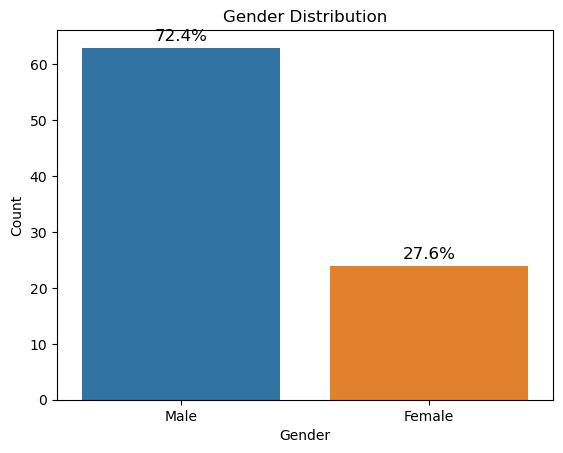

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Gender distribution bar chart
ax = sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Calculate percentages and annotate on top of each bar
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the annotation
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()


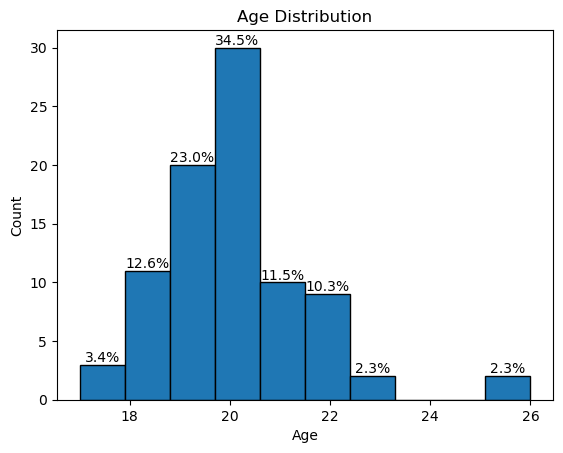

In [6]:
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Age distribution histogram
counts, bins, patches = plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Calculate total number of observations
total_counts = sum(counts)

# Annotate each bin with the percentage
for count, bin_edge in zip(counts, bins):
    if count > 0:  # Only annotate bins with counts
        percentage = f'{(count / total_counts) * 100:.1f}%'  # Calculate percentage
        plt.annotate(percentage,  # Display percentage
                     xy=(bin_edge + (bins[1] - bins[0]) / 2, count),  # Center of the bin
                     ha='center', va='bottom', fontsize=10, color='black')

plt.show()



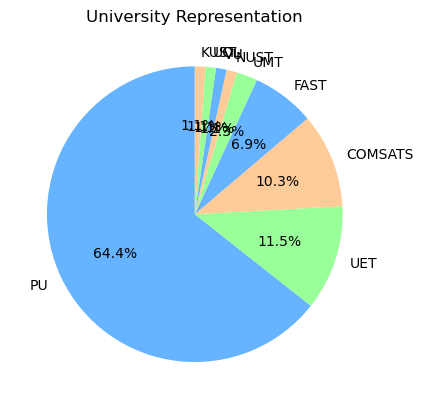

In [56]:
# University distribution pie chart
df['university'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('University Representation')
plt.ylabel('')
plt.show()


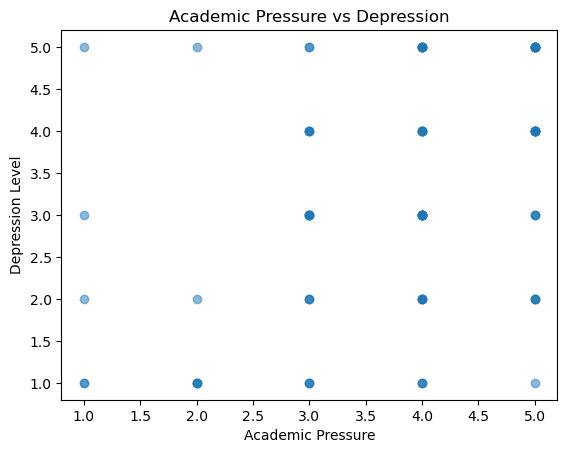

In [57]:
# Scatter plot: Academic pressure vs Depression
plt.scatter(df['academic_pressure'], df['depression'], alpha=0.5)
plt.title('Academic Pressure vs Depression')
plt.xlabel('Academic Pressure')
plt.ylabel('Depression Level')
plt.show()


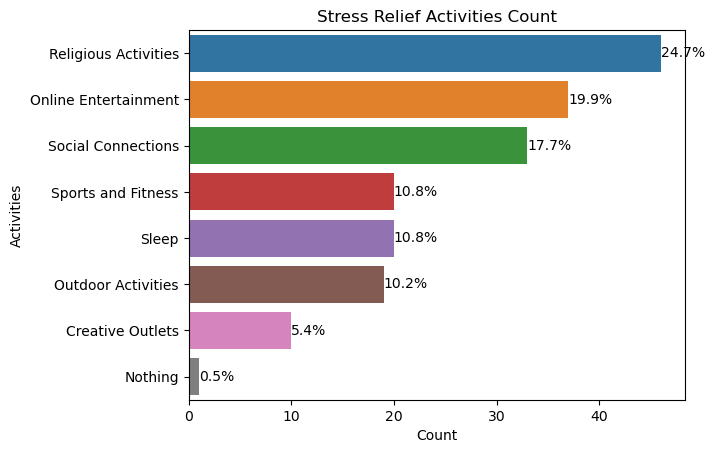

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe
df['stress_relief_activities'] = df['stress_relief_activities'].str.split(', ')
activities = df['stress_relief_activities'].explode()

# Create the countplot
ax = sns.countplot(y=activities, order=activities.value_counts().index)
plt.title('Stress Relief Activities Count')
plt.xlabel('Count')
plt.ylabel('Activities')

# Calculate total number of observations
total_counts = len(activities)

# Annotate each bar with the percentage
for p in ax.patches:
    count = p.get_width()  # Count for the bar
    percentage = f'{(count / total_counts) * 100:.1f}%'  # Calculate percentage
    ax.annotate(percentage,  # Display percentage
                (count, p.get_y() + p.get_height() / 2),  # Position of the annotation
                ha='left', va='center', fontsize=10, color='black')

plt.show()



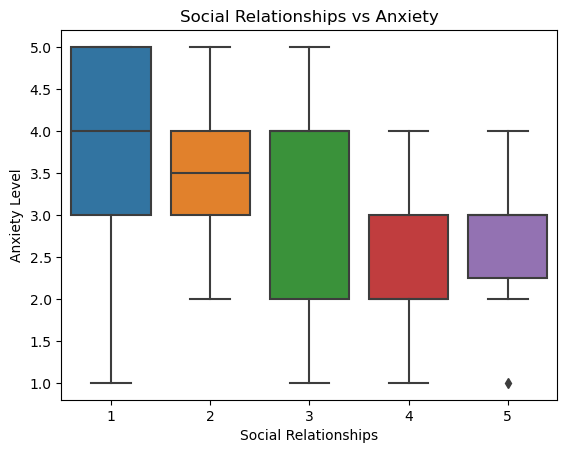

In [15]:
# Social relationships vs Anxiety
sns.boxplot(x='social_relationships', y='anxiety', data=df)
plt.title('Social Relationships vs Anxiety')
plt.xlabel('Social Relationships')
plt.ylabel('Anxiety Level')
plt.show()


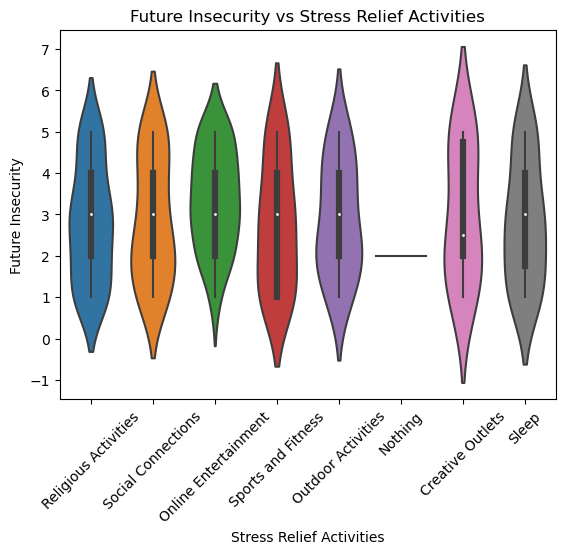

In [16]:
# Violin plot: Future insecurity vs Stress relief activities
sns.violinplot(x='stress_relief_activities', y='future_insecurity', data=df.explode('stress_relief_activities'))
plt.title('Future Insecurity vs Stress Relief Activities')
plt.xlabel('Stress Relief Activities')
plt.ylabel('Future Insecurity')
plt.xticks(rotation=45)
plt.show()


In [58]:
# Create a function to convert CGPA ranges to their averages
def convert_cgpa_range(cgpa_range):
    lower, upper = map(float, cgpa_range.split('-'))
    return (lower + upper) / 2

# Apply the function to the 'cgpa' column
df['cgpa'] = df['cgpa'].apply(convert_cgpa_range)



In [59]:
# Create a function to convert sleep hours ranges to their averages
def convert_sleep_range(sleep_range):
    lower, upper = map(float, sleep_range.replace(' hrs', '').split('-'))
    return (lower + upper) / 2

# Apply the function to the 'average_sleep' column
df['average_sleep'] = df['average_sleep'].apply(convert_sleep_range)


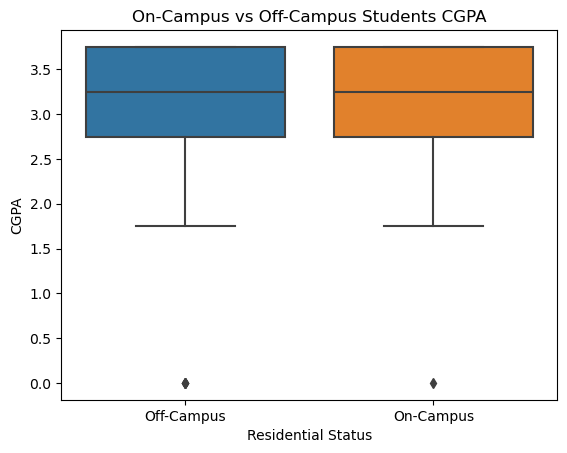

In [60]:
# CGPA based on residential status (On-Campus vs Off-Campus)
sns.boxplot(x='residential_status', y='cgpa', data=df)
plt.title('On-Campus vs Off-Campus Students CGPA')
plt.xlabel('Residential Status')
plt.ylabel('CGPA')
plt.show()


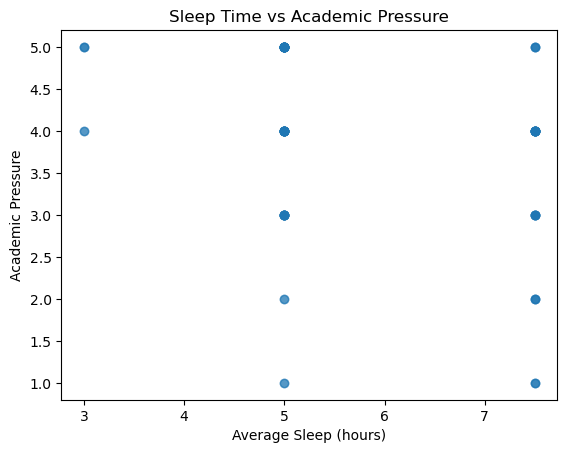

In [61]:
# Sleep time vs Academic Pressure scatter plot
plt.scatter(df['average_sleep'], df['academic_pressure'], alpha=0.5)
plt.title('Sleep Time vs Academic Pressure')
plt.xlabel('Average Sleep (hours)')
plt.ylabel('Academic Pressure')
plt.show()


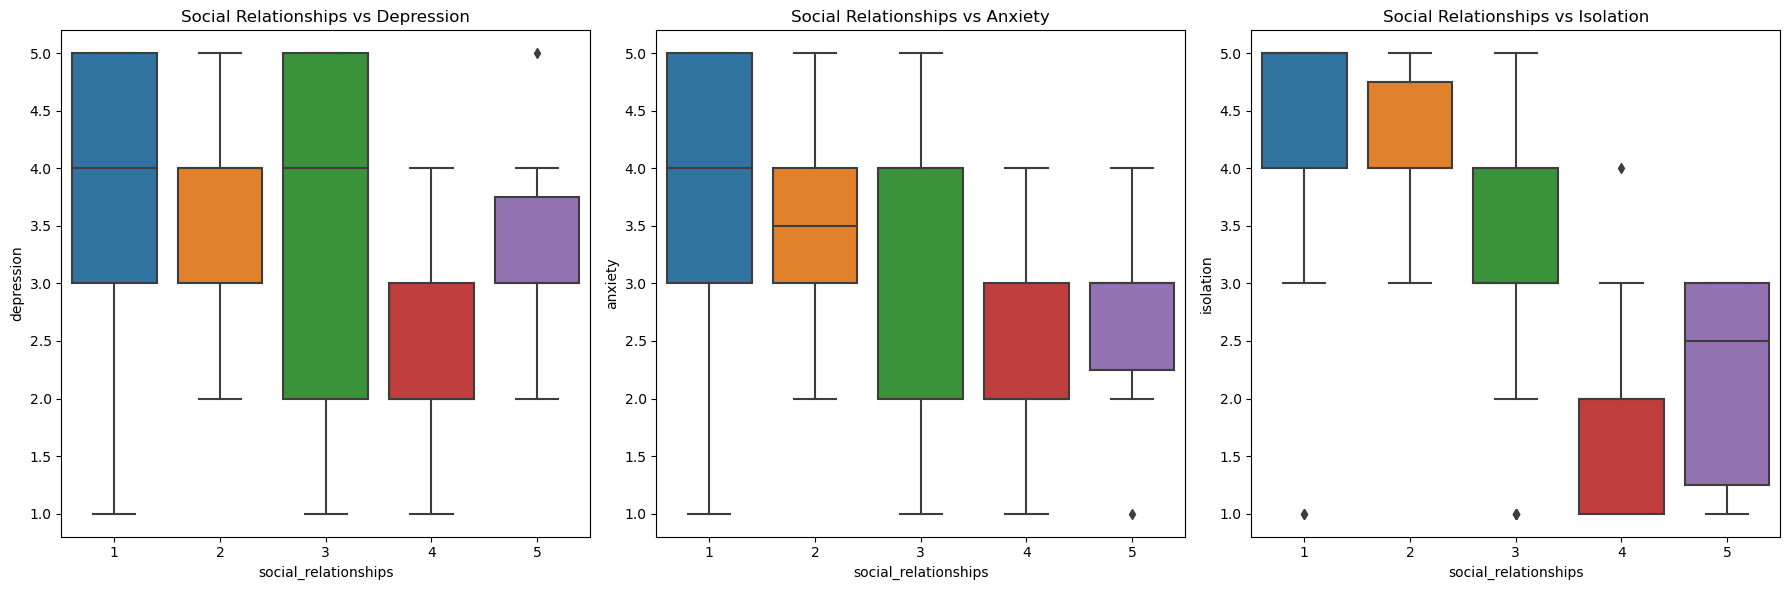

In [62]:
# Social relationships vs Depression, Anxiety, Isolation
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='social_relationships', y='depression', data=df, ax=axes[0])
axes[0].set_title('Social Relationships vs Depression')

sns.boxplot(x='social_relationships', y='anxiety', data=df, ax=axes[1])
axes[1].set_title('Social Relationships vs Anxiety')

sns.boxplot(x='social_relationships', y='isolation', data=df, ax=axes[2])
axes[2].set_title('Social Relationships vs Isolation')

plt.tight_layout()
plt.show()


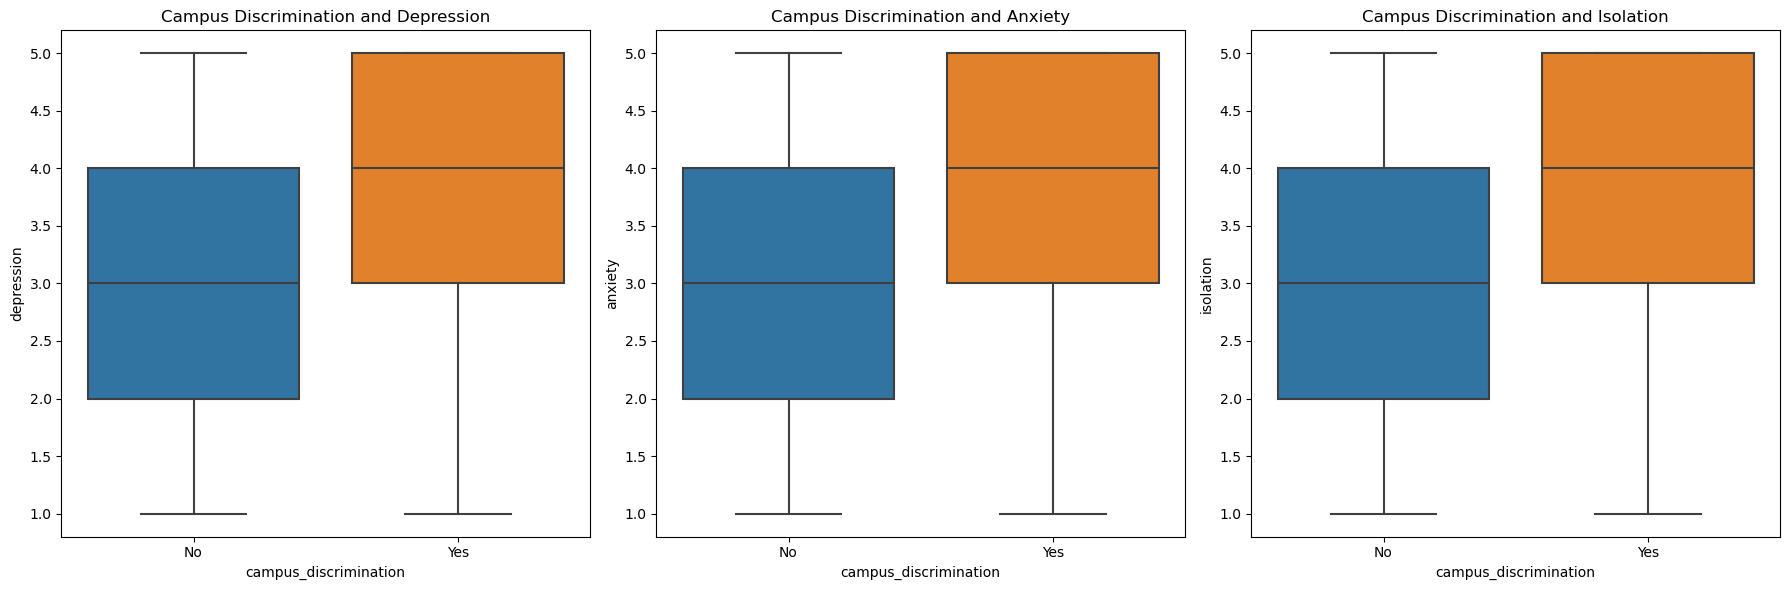

In [27]:
# Mental health outcomes by discrimination
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='campus_discrimination', y='depression', data=df, ax=axes[0])
axes[0].set_title('Campus Discrimination and Depression')

sns.boxplot(x='campus_discrimination', y='anxiety', data=df, ax=axes[1])
axes[1].set_title('Campus Discrimination and Anxiety')

sns.boxplot(x='campus_discrimination', y='isolation', data=df, ax=axes[2])
axes[2].set_title('Campus Discrimination and Isolation')

plt.tight_layout()
plt.show()



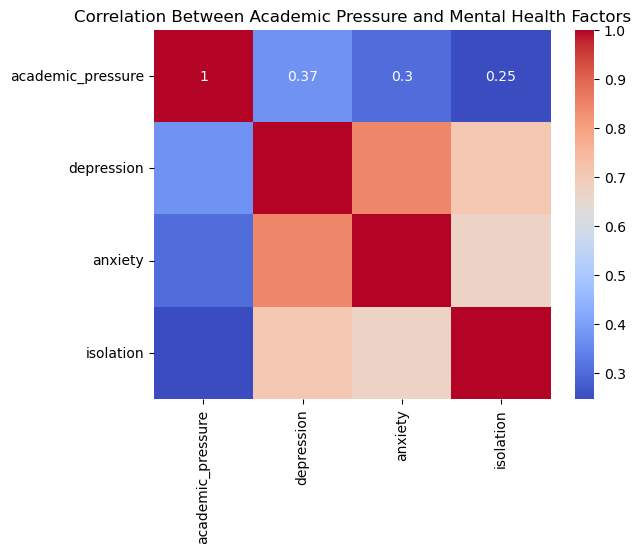

In [63]:
# Correlation heatmap for mental health factors and academic pressure
corr_matrix = df[['academic_pressure', 'depression', 'anxiety', 'isolation']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Academic Pressure and Mental Health Factors')
plt.show()


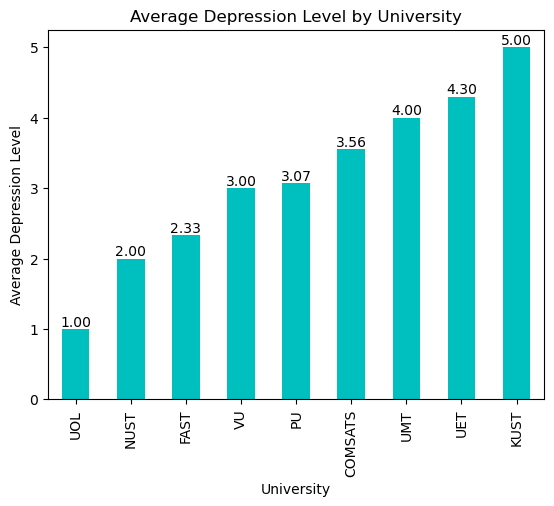

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Calculate average depression level by university
average_depression = df.groupby('university')['depression'].mean().sort_values()

# Create the bar plot
ax = average_depression.plot(kind='bar', color='c')
plt.title('Average Depression Level by University')
plt.xlabel('University')
plt.ylabel('Average Depression Level')

# Annotate each bar with the average value
for p in ax.patches:
    avg_value = p.get_height()  # Average value for the bar
    ax.annotate(f'{avg_value:.2f}',  # Display average value with 2 decimal places
                (p.get_x() + p.get_width() / 2., avg_value),  # Position of the annotation
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


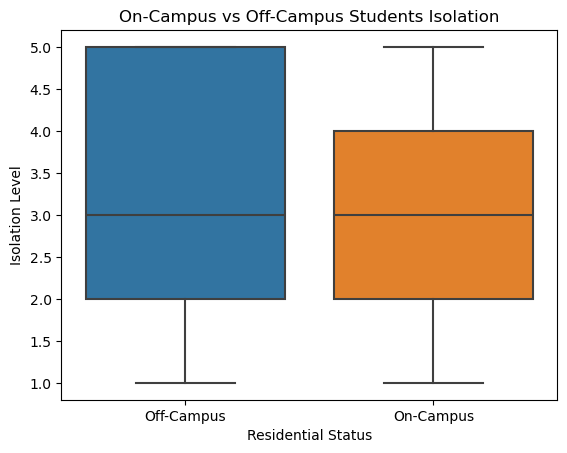

In [65]:
# Isolation based on residential status
sns.boxplot(x='residential_status', y='isolation', data=df)
plt.title('On-Campus vs Off-Campus Students Isolation')
plt.xlabel('Residential Status')
plt.ylabel('Isolation Level')
plt.show()


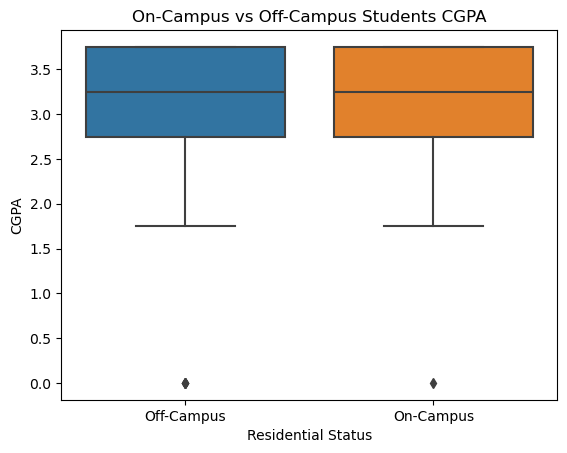

In [66]:
# CGPA based on residential status
sns.boxplot(x='residential_status', y='cgpa', data=df)
plt.title('On-Campus vs Off-Campus Students CGPA')
plt.xlabel('Residential Status')
plt.ylabel('CGPA')
plt.show()


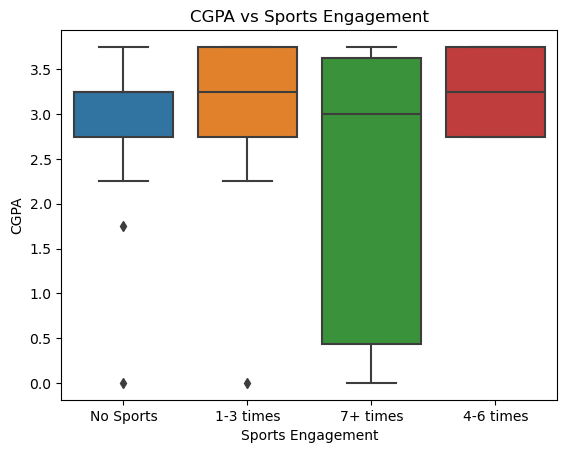

In [67]:
# Sports engagement vs CGPA
sns.boxplot(x='sports_engagement', y='cgpa', data=df)
plt.title('CGPA vs Sports Engagement')
plt.xlabel('Sports Engagement')
plt.ylabel('CGPA')
plt.show()


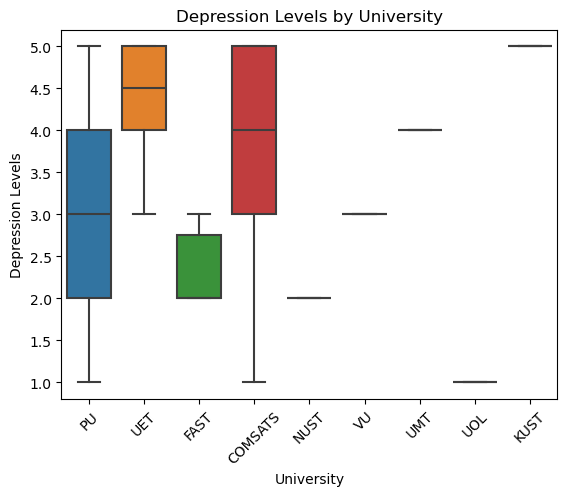

In [68]:
# Depression levels by university
sns.boxplot(x='university', y='depression', data=df)
plt.title('Depression Levels by University')
plt.xlabel('University')
plt.ylabel('Depression Levels')
plt.xticks(rotation=45)
plt.show()




C:\Users\Mega Store\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mega Store\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mega Store\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mega Store\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

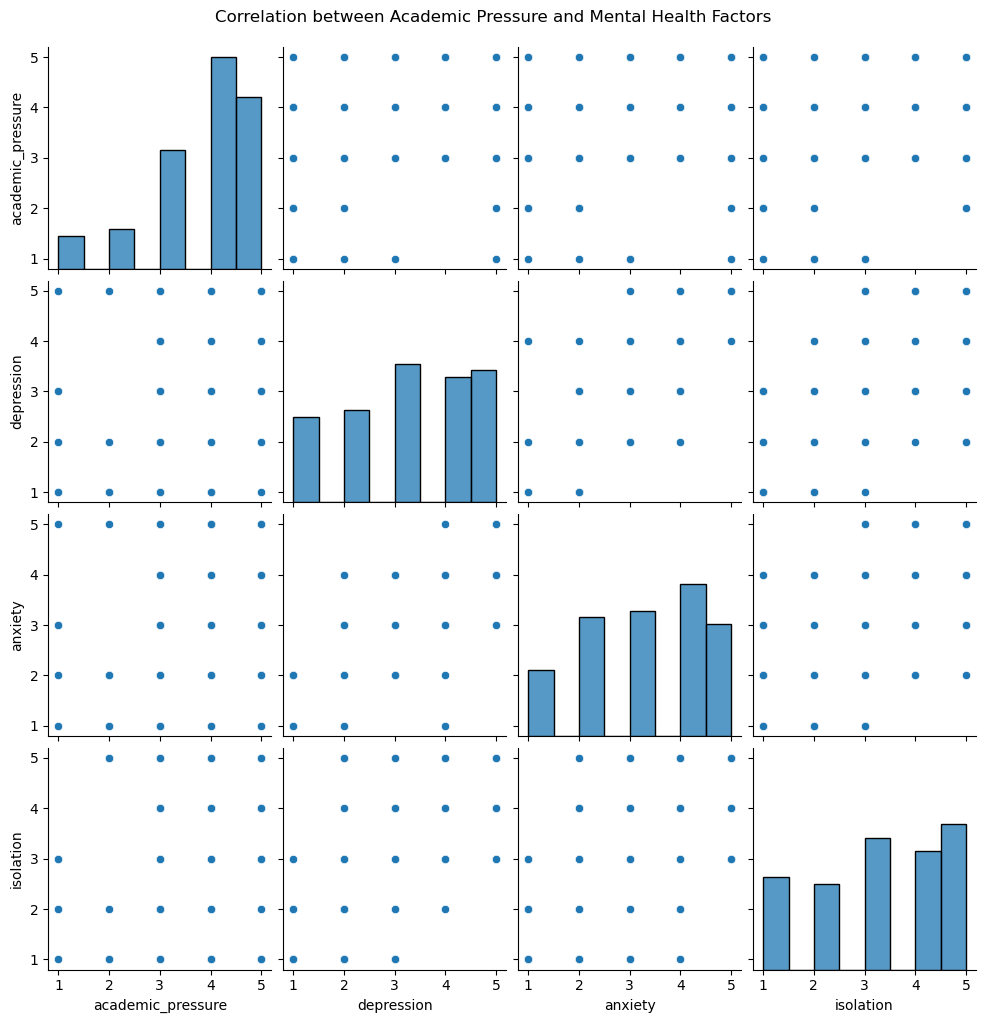

In [37]:
# Pairplot to visualize correlations between mental health factors and academic pressure
sns.pairplot(df[['academic_pressure', 'depression', 'anxiety', 'isolation']])
plt.suptitle('Correlation between Academic Pressure and Mental Health Factors', y=1.02)
plt.show()


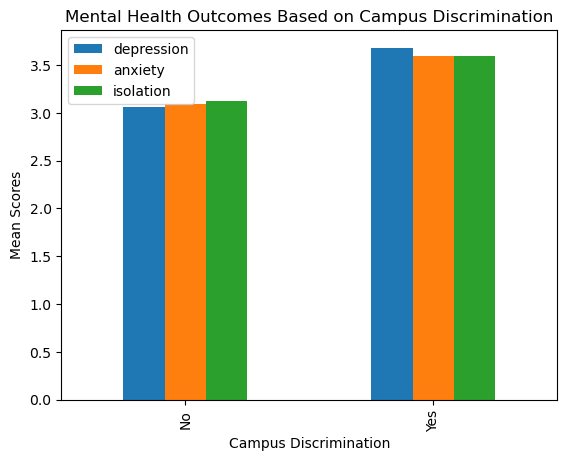

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert columns to numeric, coercing errors
df['depression'] = pd.to_numeric(df['depression'], errors='coerce')
df['anxiety'] = pd.to_numeric(df['anxiety'], errors='coerce')
df['isolation'] = pd.to_numeric(df['isolation'], errors='coerce')

# Drop rows with NaN values in specified columns
df.dropna(subset=['depression', 'anxiety', 'isolation'], inplace=True)

# Group by 'campus_discrimination' and calculate the mean
df_grouped = df.groupby('campus_discrimination')[['depression', 'anxiety', 'isolation']].mean().reset_index()

# Plot the results
df_grouped.plot(x='campus_discrimination', kind='bar')
plt.title('Mental Health Outcomes Based on Campus Discrimination')
plt.xlabel('Campus Discrimination')
plt.ylabel('Mean Scores')
plt.show()


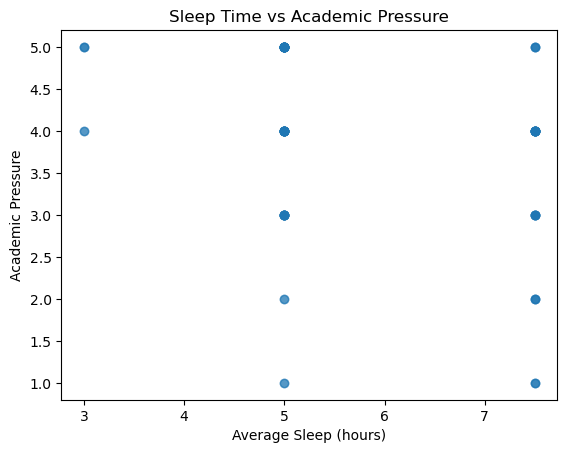

In [39]:
# Sleep time vs Academic Pressure
plt.scatter(df['average_sleep'], df['academic_pressure'], alpha=0.5)
plt.title('Sleep Time vs Academic Pressure')
plt.xlabel('Average Sleep (hours)')
plt.ylabel('Academic Pressure')
plt.show()


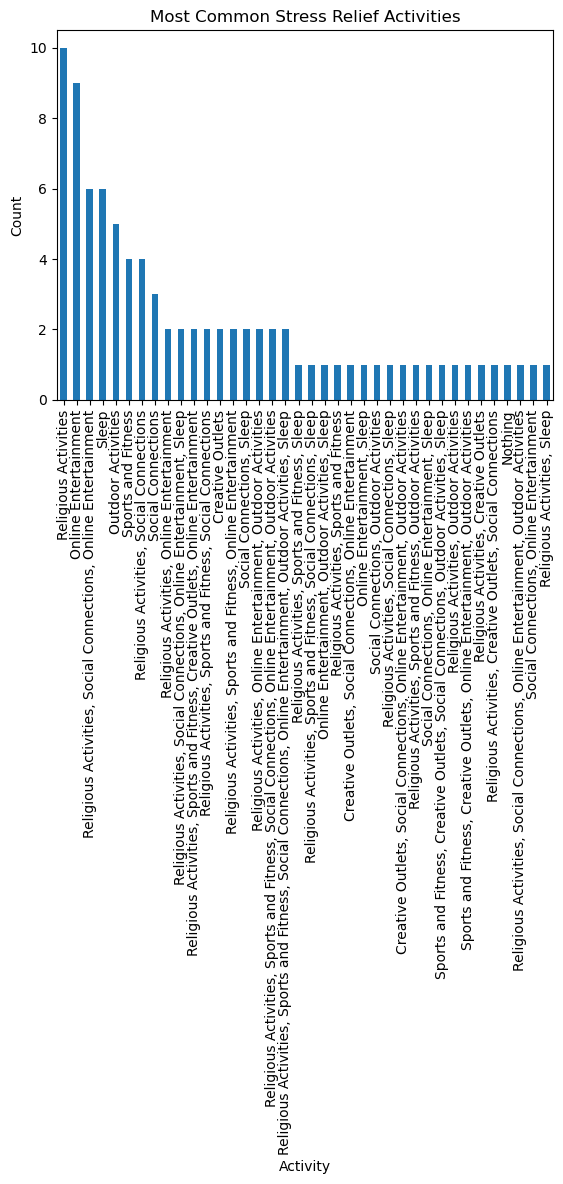

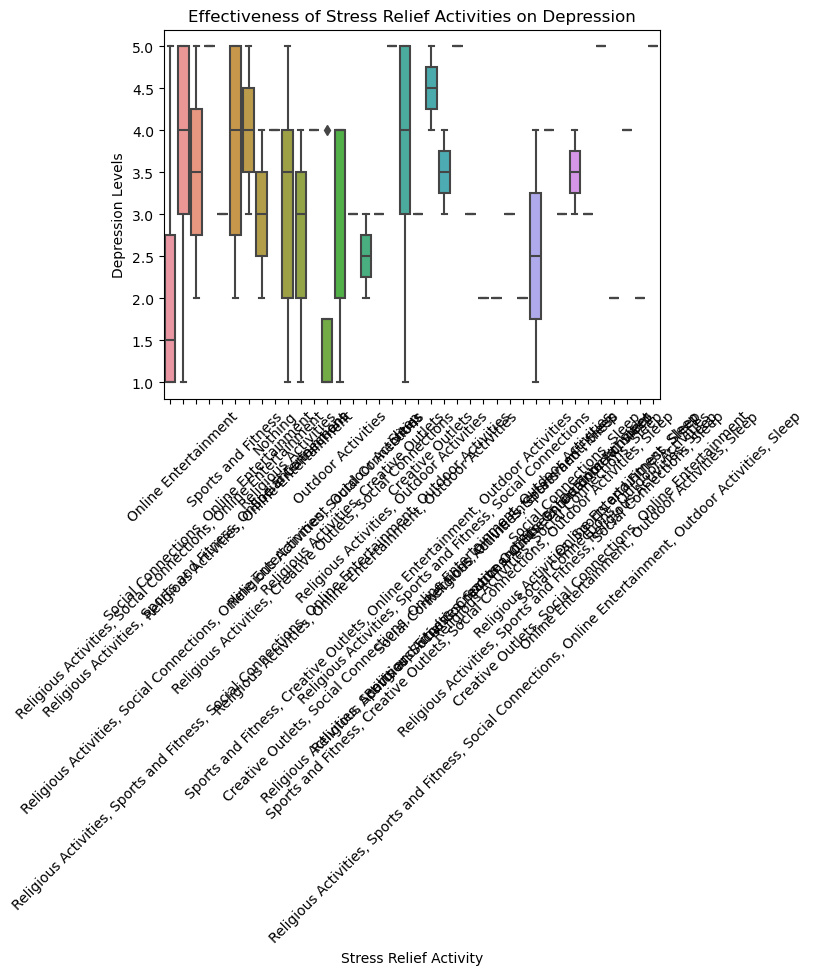

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Check if the column 'stress_relief_activities' exists
if 'stress_relief_activities' in df.columns:
    # Get value counts and check if it's not empty
    activity_counts = df['stress_relief_activities'].value_counts()
    if not activity_counts.empty:
        # Most common stress relief activities
        activity_counts.plot(kind='bar')
        plt.title('Most Common Stress Relief Activities')
        plt.xlabel('Activity')
        plt.ylabel('Count')
        plt.show()
    else:
        print("The 'stress_relief_activities' column is empty.")
else:
    print("The 'stress_relief_activities' column is missing.")

# Check if the required columns exist for boxplot
if 'stress_relief_activities' in df.columns and 'depression' in df.columns:
    # Create the boxplot if data is available
    if not df['stress_relief_activities'].dropna().empty and not df['depression'].dropna().empty:
        sns.boxplot(x='stress_relief_activities', y='depression', data=df)
        plt.title('Effectiveness of Stress Relief Activities on Depression')
        plt.xlabel('Stress Relief Activity')
        plt.ylabel('Depression Levels')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("The required columns have no valid data for the boxplot.")
else:
    print("The required columns for the boxplot are missing.")


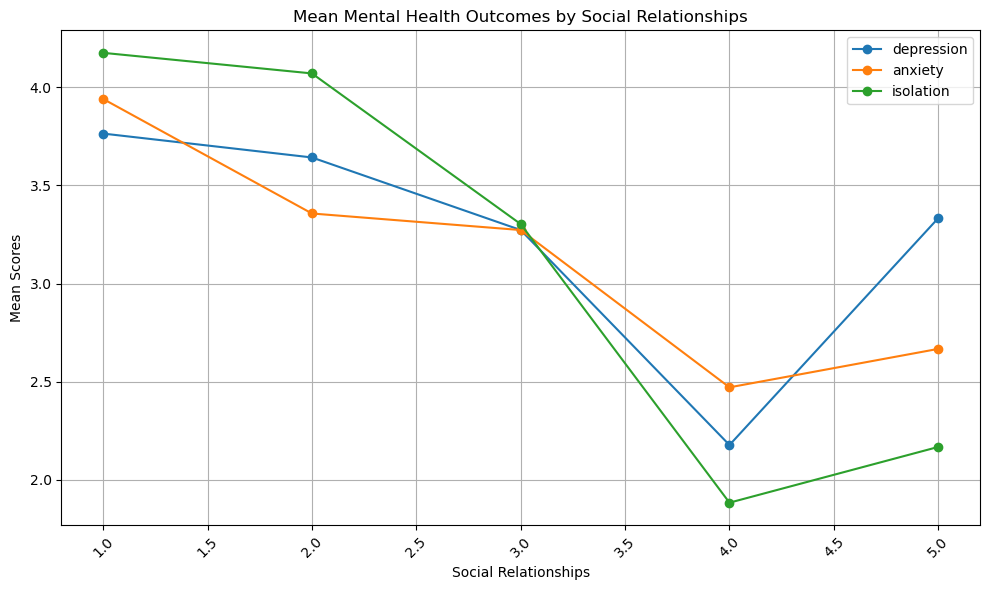

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Clean data and convert relevant columns to numeric, coercing errors to NaN
df_grouped = (
    df_cleaned.assign(
        depression=pd.to_numeric(df_cleaned['depression'], errors='coerce'),
        anxiety=pd.to_numeric(df_cleaned['anxiety'], errors='coerce'),
        isolation=pd.to_numeric(df_cleaned['isolation'], errors='coerce')
    )
    .groupby('social_relationships')
    .mean(numeric_only=True)[['depression', 'anxiety', 'isolation']]
    .reset_index()
)

# Visualization
plt.figure(figsize=(10, 6))
for column in ['depression', 'anxiety', 'isolation']:
    plt.plot(df_grouped['social_relationships'], df_grouped[column], marker='o', label=column)

plt.title('Mean Mental Health Outcomes by Social Relationships')
plt.xlabel('Social Relationships')
plt.ylabel('Mean Scores')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [73]:
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.25,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.25,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.75,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.75,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.25,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Categorize sleep time into bins
sleep_bins = pd.cut(df['average_sleep'], bins=[0, 4, 6, 8, 10, 12], labels=['0-4 hrs', '4-6 hrs', '6-8 hrs', '8-10 hrs', '10-12 hrs'])

# Group by sleep bins and calculate the mean academic pressure for each bin
df_grouped = df.groupby(sleep_bins)['academic_pressure'].mean().reset_index()

# Set figure size
plt.figure(figsize=(8, 6))

# Create the bar plot
plt.bar(df_grouped['average_sleep'], df_grouped['academic_pressure'], color='c', edgecolor='grey')

# Add labels and title
plt.xlabel('Average Sleep (hours)', fontweight='bold')
plt.ylabel('Mean Academic Pressure', fontweight='bold')
plt.title('Average Sleep Time vs Academic Pressure')

# Show plot
plt.tight_layout()
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_10908\2838739209.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(pressure_bins)['depression'].mean().reset_index()


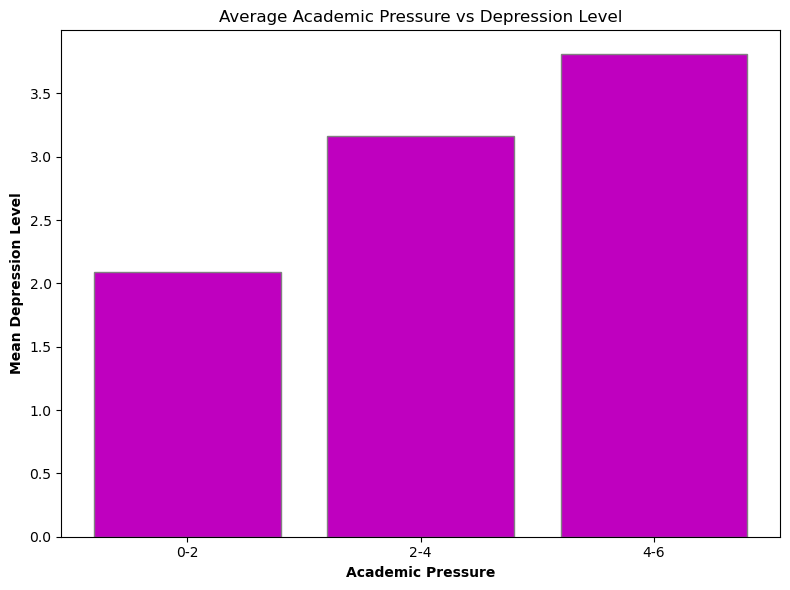

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Categorize academic pressure into bins
pressure_bins = pd.cut(df['academic_pressure'], bins=[0, 2, 4, 6, 8, 10], labels=['0-2', '2-4', '4-6', '6-8', '8-10'])

# Group by pressure bins and calculate the mean depression level for each bin
df_grouped = df.groupby(pressure_bins)['depression'].mean().reset_index()

# Set figure size
plt.figure(figsize=(8, 6))

# Create the bar plot
plt.bar(df_grouped['academic_pressure'], df_grouped['depression'], color='m', edgecolor='grey')

# Add labels and title
plt.xlabel('Academic Pressure', fontweight='bold')
plt.ylabel('Mean Depression Level', fontweight='bold')
plt.title('Average Academic Pressure vs Depression Level')

# Show plot
plt.tight_layout()
plt.show()


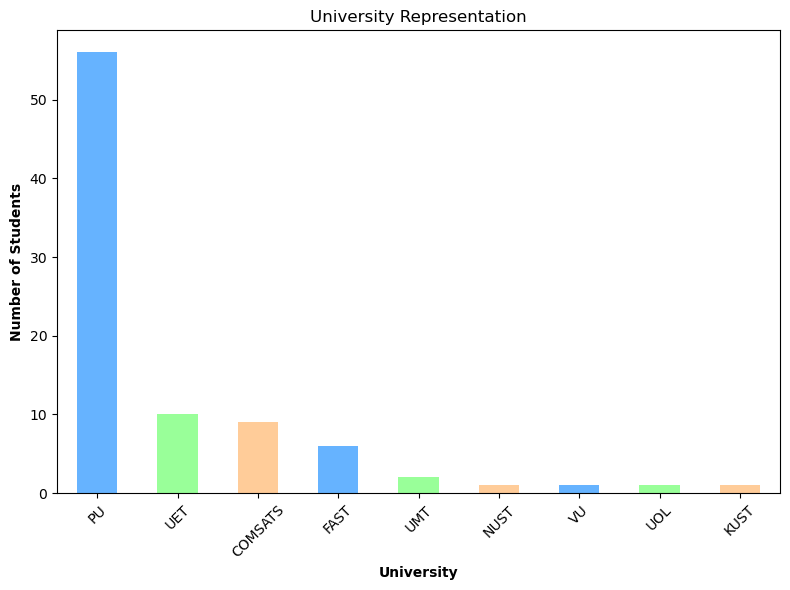

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Count the number of occurrences of each university
university_counts = df['university'].value_counts()

# Set figure size
plt.figure(figsize=(8, 6))

# Create the bar plot
university_counts.plot(kind='bar', color=['#66b3ff', '#99ff99', '#ffcc99'])

# Add labels and title
plt.xlabel('University', fontweight='bold')
plt.ylabel('Number of Students', fontweight='bold')
plt.title('University Representation')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
